In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

UNCLASSIFIED = False
NOISE = -1

In [2]:
def _dist(p,q):
    # compute and return the euclidean distance
    # put your code here
    elu_dis=np.sqrt((p[0]-q[0])**2+(p[1]-q[1])**2)
    return elu_dis

In [3]:
#Task2

In [4]:
random.seed(777)
scat_X = np.array(list(random.randint(-1000, 1000) for _ in range(1000)))
scat_Y = np.array(list(random.randint(-1000, 1000) for _ in range(1000)))
# You might need to do some reshape and stack here...

scat_X=scat_X.reshape((1000,1))
scat_Y=scat_Y.reshape((1000,1))
scat_data=np.hstack((scat_X,scat_Y))

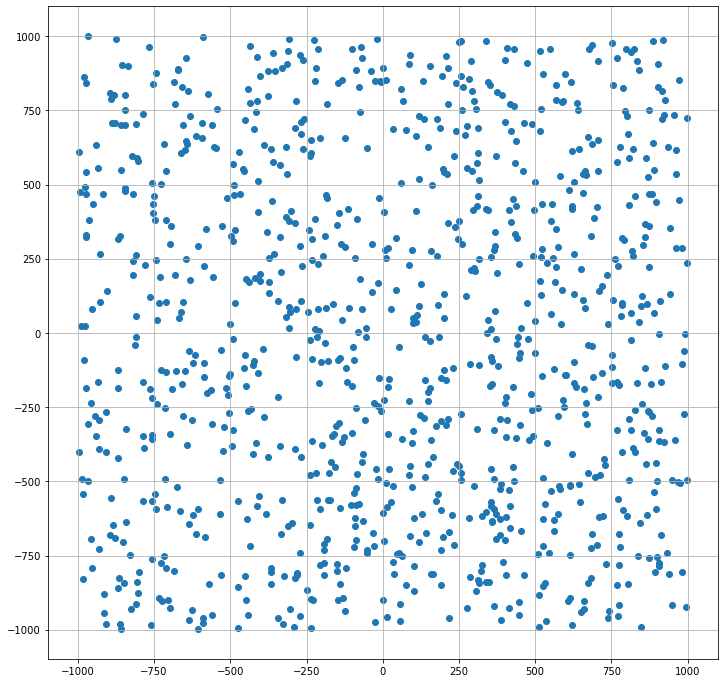

In [5]:
%matplotlib inline
plt.figure(figsize = (12, 12))
plt.scatter(scat_X,scat_Y)    # Put the "X" and "Y" in the scatter plot function...
# How to make the ＂格線＂ of X and Y the same length...? Google might help!
plt.grid()

In [6]:
#test
print(scat_data) 
print(type(scat_data)) #<class 'numpy.ndarray'>
print(scat_data.shape) #(1000, 2)
print(len(scat_data)) #1000
print(scat_data[0]) #[-531 -814]
print(scat_data[0][0]) #-531

list1=[]
list1.append(scat_data[0][0])
list1.append(scat_data[0][1])
print(list1)
list_big=[]
list_big.append(list1)
print(list_big)
list2=[]
list2.append(scat_data[1][0])
list2.append(scat_data[1][1])
print(list2)
list_big.append(list2)
print(list_big)

[[-531 -814]
 [ -87 -697]
 [ -88 -521]
 ...
 [ 786  320]
 [ 678  958]
 [ 926  785]]
<class 'numpy.ndarray'>
(1000, 2)
1000
[-531 -814]
-531
[-531, -814]
[[-531, -814]]
[-87, -697]
[[-531, -814], [-87, -697]]


In [7]:
def radius(ndarray, r):
    boolean_mask = []
    for i in range(len(scat_data)):
        if _dist([ndarray[i][0],ndarray[i][1]],[0,0])<=r:
            temp=[]
            temp.append(ndarray[i][0])
            temp.append(ndarray[i][1])
            boolean_mask.append(temp)
                       
    # Check if a point is in the given radius
    
    return boolean_mask

In [8]:
#test
data_list = radius(scat_data, 1000)
data_list
print(len(data_list))



790


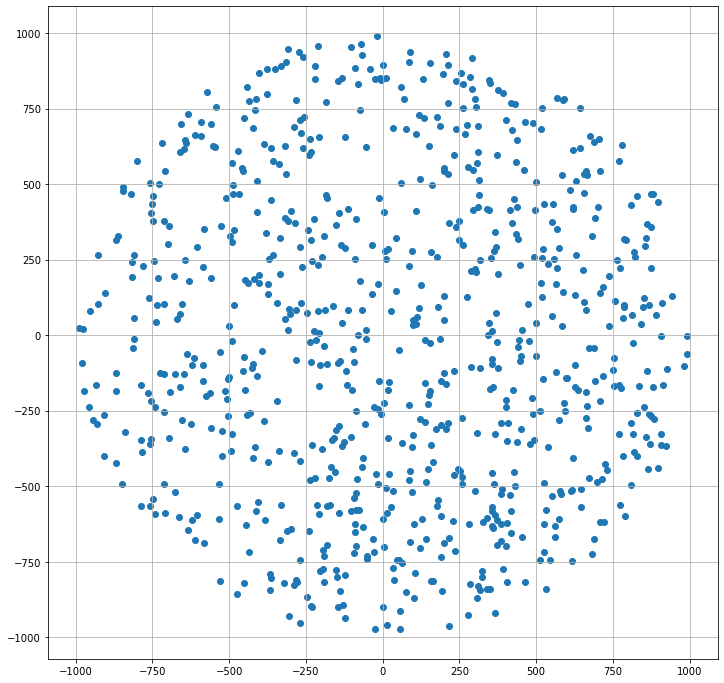

In [9]:
%matplotlib inline
plt.figure(figsize = (12, 12))
plt.grid()
for i in range(len(data_list)):
    plt.scatter(data_list[i][0],data_list[i][1],c="tab:blue")    

# Put the "X" and "Y" in the scatter plot function...
# How to make the ＂格線＂ of X and Y the same length...? Google might help!

In [10]:
#轉換資料型態方便運算
data_array=np.array(data_list)
print(data_array)
print(data_array[0])

[[-531 -814]
 [ -87 -697]
 [ -88 -521]
 ...
 [ 260  751]
 [ -25  848]
 [ 786  320]]
[-531 -814]


In [11]:
# Calculates the distance between each point...
dist_each= np.full((1,len(data_array)),0)
for i in range(len(data_array)):
    dis_for_i=[]
    x=data_array[i][0]
    y=data_array[i][1]
    time=len(data_array)
    for j in range(time):
        temp_dis=_dist([data_array[i][0],data_array[i][1]],[data_array[j][0],data_array[j][1]])
        temp_dis=int(temp_dis**2)
        dis_for_i.append(temp_dis)
    dis_for_i=np.array(dis_for_i)
    dist_each=np.vstack((dist_each,dis_for_i))
    #print(dis_for_i)

dist_sq=np.delete(dist_each,0,axis=0)
print(dist_sq)

                   
        

[[      0  210825  282098 ... 3074906 3018280 3020445]
 [ 210825       0   30977 ... 2217113 2390869 1796418]
 [ 282098   30977       0 ... 1739087 1878129 1471157]
 ...
 [3074906 2217113 1739087 ...       0   90634  462437]
 [3018280 2390869 1878129 ...   90634       0  936504]
 [3020445 1796418 1471157 ...  462437  936504       0]]


In [12]:
#test
x=np.array([0,0])
y=np.array([3,4])
z=np.vstack((x, y))

a = np.empty((2))
#print(a)

n = np.full((1, 7), 0)
print(n)

print(z)
new= np.delete(z,1,axis = 0)
print(new)


[[0 0 0 0 0 0 0]]
[[0 0]
 [3 4]]
[[0 0]]


In [13]:
# Find the nearest neighbor of each point...
nearest = np.argsort(dist_sq,axis=1)

In [14]:
print(nearest)

[[  0  55  29 ... 599 278 614]
 [  1 639 252 ... 505 609 253]
 [  2 676 261 ...  31 609 253]
 ...
 [787 738 643 ...  55 740 618]
 [788 373 557 ... 546 134 535]
 [789 295  19 ... 523 194 629]]


In [15]:
#test
dis_3=nearest[0][1:4]
print(dis_3)
print(data_array[dis_3])


[ 55  29 495]
[[-475 -856]
 [-453 -819]
 [-436 -719]]


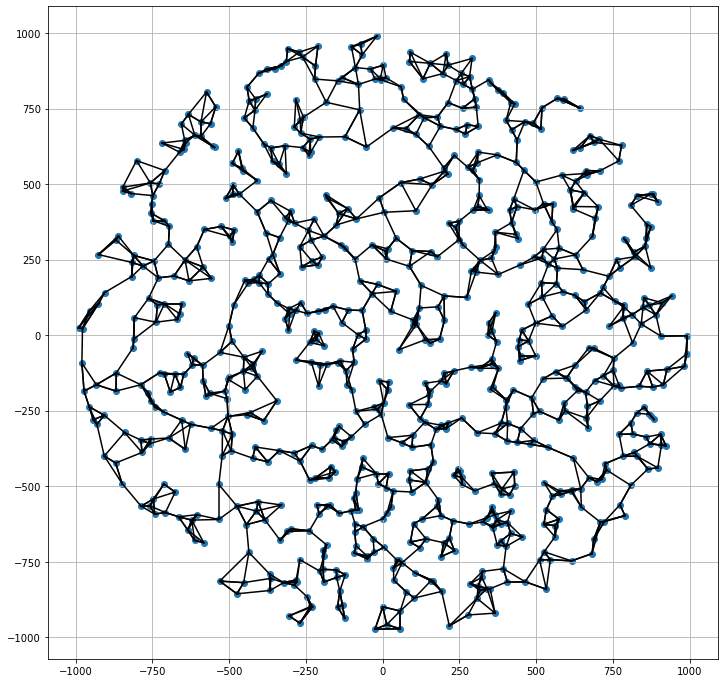

In [16]:
%matplotlib inline
plt.figure(figsize = (12, 12))
plt.grid()
k=3
for i in range(len(data_array)):
    dis_k=nearest[i][1:k+1]
    plot_k=data_array[dis_k] #nearest 3
    plt.scatter(data_array[i][0],data_array[i][1],c="tab:blue")
    for j in range(k):
        plt.plot([data_array[i][0],plot_k[j][0]],[data_array[i][1],plot_k[j][1]],c="k")
            